<a href="https://colab.research.google.com/github/bharatbs13/AIML/blob/master/run_composite_markov_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
sec = userdata.get('GIT_SECRET_KEY')
url = f'https://{sec}@github.com/bharatbs13/QML.git'


In [ ]:
!rm -rf QML
!git clone {url}

Cloning into 'QML'...
remote: Enumerating objects: 2085, done.
remote: Counting objects: 100% (539/539), done.
remote: Compressing objects: 100% (277/277), done.
remote: Total 2085 (delta 370), reused 377 (delta 258), pack-reused 1546 (from 1)
Receiving objects: 100% (2085/2085), 3.75 MiB | 8.66 MiB/s, done.
Resolving deltas: 100% (1423/1423), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Create Virtual Env

In [ ]:
# Install virtualenv
!pip install virtualenv

# Create a virtual environment
!virtualenv myenv

# Activate the virtual environment
!source myenv/bin/activate

# Install required packages in the virtual environment
!pip install -r /content/QML/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 20.1 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 1977ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.3.1, setuptools==75.6.0, wheel==0.45.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.2 MB/

In [ ]:
import QML.bc.UtilFunc as UF
import QML.bc.Markov as MA
import QML.bc.Controller as CO
import QML.bc.Strategy as ST
import QML.bc.Ledger as LE
import QML.bc.Amfi as AM
import QML.bc.Weighing as WE
import QML.bc.yfinance as YF
import QML.bc.clustering as CL
import QML.bc.SigProc as SI
import QML.bc.indicators as  ID
import QML.bc
from QML.bc import config


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from datetime import  timedelta, date
from dateutil.relativedelta import relativedelta
delta = 12
end_date = date(2024, 10, 17)
#'2024-11-17' this date no equity were selected , use this for error handling scanario
#end_date = date.today()

start_date= end_date-relativedelta(months=delta)
start_date = start_date.strftime('%Y-%m-%d')
end_date = end_date.strftime('%Y-%m-%d')
start_date , end_date

('2023-10-17', '2024-10-17')

In [ ]:
final_data_dict = {}

In [ ]:
base_path = "/content/drive/MyDrive"


In [ ]:
config_file = f"{base_path}/configs/markov_config_nifty50.csv"
config_file = f"{base_path}/configs/markov_config_nifty50Etf.csv"

In [ ]:
config_df = pd.read_csv(config_file)
config_df.head()

,id,main_strategy,parent_indicator,asset_file,model_parameter_file,run_markov_on,run_stats_on,child_indicator
0,1,cp50etf,close_price,input_files/securities/ind_nifty50Etf.csv,models/parameters/markov_regime/ClosePrice_cle...,clean_signal,signal,NaN
1,2,cpobv50etf,close_price,input_files/securities/ind_nifty50Etf.csv,models/parameters/markov_regime/ClosePrice_cle...,clean_signal,signal,obv


In [ ]:
config_df.rename(columns=lambda x: x.strip(), inplace=True)


In [ ]:
config_df['strategy_type']=np.where(config_df.isna().any(axis=1), 'singal_indicator', 'multi_indicator')

In [ ]:
config_df

,id,main_strategy,parent_indicator,asset_file,model_parameter_file,run_markov_on,run_stats_on,child_indicator,strategy_type
0,1,cp50etf,close_price,input_files/securities/ind_nifty50Etf.csv,models/parameters/markov_regime/ClosePrice_cle...,clean_signal,signal,NaN,singal_indicator
1,2,cpobv50etf,close_price,input_files/securities/ind_nifty50Etf.csv,models/parameters/markov_regime/ClosePrice_cle...,clean_signal,signal,obv,multi_indicator


In [ ]:
config_df['cp_col'] = np.where(config_df['parent_indicator'] == 'close_price', 'parent_indicator', np.where(config_df['child_indicator'] == 'close_price', 'child_indicator', np.nan))

In [ ]:
config_df

,id,main_strategy,parent_indicator,asset_file,model_parameter_file,run_markov_on,run_stats_on,child_indicator,strategy_type,cp_col
0,1,cp50etf,close_price,input_files/securities/ind_nifty50Etf.csv,models/parameters/markov_regime/ClosePrice_cle...,clean_signal,signal,NaN,singal_indicator,parent_indicator
1,2,cpobv50etf,close_price,input_files/securities/ind_nifty50Etf.csv,models/parameters/markov_regime/ClosePrice_cle...,clean_signal,signal,obv,multi_indicator,parent_indicator


In [ ]:
config.base_path = base_path
config.config_df = config_df
print(f"Updated base_path: {config.base_path}")


Updated base_path: /content/drive/MyDrive


In [ ]:
config.base_path

'/content/drive/MyDrive'

## Load Data

In [ ]:
import os

In [ ]:
asset_str = os.path.splitext(os.path.basename(config_file))[0].split("_")[-1]
asset_str

'nifty50Etf'

In [ ]:
bond_assets_file = 'input_files/securities/BondEtfs.csv'
asset_class_df = pd.read_csv(os.path.join(base_path, 'input_files/securities/asset_class.csv'))


In [ ]:
asset_class_df.head()

,codes,company,industry,class
0,ADANIENT,Adani Enterprises Ltd.,Metals & Mining,equity
1,ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,Services,equity
2,APOLLOHOSP,Apollo Hospitals Enterprise Ltd.,Healthcare,equity
3,ASIANPAINT,Asian Paints Ltd.,Consumer Durables,equity
4,AXISBANK,Axis Bank Ltd.,Financial Services,equity


In [ ]:
config.asset_dict[asset_str]

'input_files/securities/ind_nifty50Etf.csv'

In [ ]:
#[olhc_renamed_dict , denoise_dict] = CO.get_one_time_olhc(base_path, asset_dict[asset_str], start_date, end_date)
[olhc_renamed_dict , denoise_dict] = CO.get_one_time_olhc(config.asset_dict[asset_str], start_date, end_date)

[*********************100%***********************]  80 of 80 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WIPRO.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-10-17 -> 2024-10-17)')


remove columns having high nan, then foward fill then remove column non-neumeric
open_price : columns dropped  after nan thresholding : 80-71
high_price : columns dropped  after nan thresholding : 80-71
close_price : columns dropped  after nan thresholding : 80-71
low_price : columns dropped  after nan thresholding : 80-71
volume : columns dropped  after nan thresholding : 80-71
open_price : columns dropped  after float casting : 71-68
high_price : columns dropped  after float casting : 71-68
close_price : columns dropped  after float casting : 71-68
low_price : columns dropped  after float casting : 71-68
volume : columns dropped  after float casting : 71-68


In [ ]:
[bond_ts , _] = CO.get_one_time_olhc(bond_assets_file, start_date, end_date)



[*********************100%***********************]  11 of 11 completed
ERROR:yfinance:
5 Failed downloads:
ERROR:yfinance:['LICNMFET.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-10-17 -> 2024-10-17)')
ERROR:yfinance:['RRSLGETF.NS', 'RELNV20.NS', 'RELCNX100.NS', 'RELDIVOPP.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


remove columns having high nan, then foward fill then remove column non-neumeric
open_price : columns dropped  after nan thresholding : 11-6
high_price : columns dropped  after nan thresholding : 11-6
close_price : columns dropped  after nan thresholding : 11-6
low_price : columns dropped  after nan thresholding : 11-6
volume : columns dropped  after nan thresholding : 11-6
open_price : columns dropped  after float casting : 6-6
high_price : columns dropped  after float casting : 6-6
close_price : columns dropped  after float casting : 6-6
low_price : columns dropped  after float casting : 6-6
volume : columns dropped  after float casting : 6-6


In [ ]:
bond_ts['close_price']

Ticker,signal_BANKBEES,signal_CPSEETF,signal_HNGSNGBEES,signal_JUNIORBEES,signal_RELCONS,signal_SHARIABEES
Date,,,,,,
2023-10-17,452.500000,54.580002,263.839996,482.670013,72.220001,442.329987
2023-10-18,448.179993,54.130001,264.190002,478.649994,72.220001,440.920013
2023-10-19,446.750000,54.040001,260.290009,477.160004,72.220001,440.859985
2023-10-20,446.350006,53.650002,257.450012,473.440002,72.220001,438.720001
2023-10-23,440.829987,52.580002,256.010010,464.559998,72.220001,434.100006
...,...,...,...,...,...,...
2024-10-10,529.190002,98.000000,369.910004,803.299988,72.220001,580.460022
2024-10-11,526.460022,97.919998,381.779999,804.150024,72.220001,582.130005
2024-10-14,531.760010,97.870003,359.510010,807.010010,72.220001,582.409973


In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 353 µs (started: 2024-12-17 09:49:21 +00:00)


## Bulk Markov

time: 9.4 ms (started: 2024-12-10 10:28:26 +00:00)


In [ ]:
olhc_renamed_dict, denoise_dict = CO.insert_all_indicators(olhc_renamed_dict, denoise_dict)

Getting data for inidicator : obv
shape of indicator df (245, 68)
shape of clean indicator df (245, 68)
time: 4.45 s (started: 2024-12-17 09:49:21 +00:00)


In [ ]:
## optimize this not to repeat markov training
global_dict = CO.CreateMarkovDicts(olhc_renamed_dict, denoise_dict).generate_dicts()

shape of merged df (245, 136)
Running Markov
Markov will run on : clean_signal
Stats will run on : signal
>>>>Running Markov on stored params
>>>>>Retraining  Markov completed
shape of merged df (245, 136)
Running Markov
Markov will run on : clean_signal
Stats will run on : signal
>>>>Running Markov on stored params
>>>>>Retraining  Markov completed
time: 15min 25s (started: 2024-12-17 10:31:19 +00:00)


In [ ]:
global_dict = MA.add_markov_statistics(global_dict, olhc_renamed_dict)


Not enough data for ADANIPORTS , min length required : 10
Not enough data for APOLLOHOSP , min length required : 10
Not enough data for AXISGOLD , min length required : 10
Not enough data for BHARTIARTL , min length required : 10
Not enough data for BPCL , min length required : 10
Not enough data for BRITANNIA , min length required : 10
Not enough data for BSLGOLDETF , min length required : 10
Not enough data for DIVISLAB , min length required : 10
Not enough data for GOLD1 , min length required : 10
Not enough data for GOLDBEES , min length required : 10
Not enough data for GOLDETF , min length required : 10
Not enough data for GOLDETFADD , min length required : 10
Not enough data for GOLDSHARE , min length required : 10
Not enough data for GRASIM , min length required : 10
Not enough data for HDFCBANK , min length required : 10
Not enough data for HDFCGOLD , min length required : 10
Not enough data for HDFCLIFE , min length required : 10
Not enough data for HINDALCO , min length requ

In [ ]:
global_dict = MA.RegimeDerivedStats(global_dict).add_multi_indicator_derived_stats()

time: 4.21 ms (started: 2024-12-17 10:46:47 +00:00)


In [ ]:
#global_dict[1]['indicator']
#global_dict[1]['clean_indicator']
#global_dict[1]['markov_data']['regime_df']
#global_dict[1]['markov_data']['regime_label']
#global_dict[1]['markov_data']['latest_regime']
#global_dict[1]['markov_data']['regime_summary_dict_df']['HEROMOTOCO']
#global_dict[1]['markov_data']['markov_regime_summary_df']
#global_dict[1]['markov_data']['markov_regime_type_summary_df']
#global_dict[1]['markov_data']['markov_regime_class_blocks_dict_df']['HEROMOTOCO']
#global_dict[2]['final_stats']




time: 383 µs (started: 2024-12-17 11:04:38 +00:00)


In [ ]:
import os
import pandas as pd
import shutil


def clear_storage_contents(base_path):
    """
    Deletes all files and subdirectories inside the given directory,
    without deleting the directory itself.

    Parameters:
    - base_path (str): Path of the directory whose contents need to be cleared.
    """
    if os.path.exists(base_path):
        for entry in os.listdir(base_path):
            entry_path = os.path.join(base_path, entry)
            if os.path.isdir(entry_path):
                shutil.rmtree(entry_path)  # Remove subdirectory
            else:
                os.remove(entry_path)  # Remove file
    else:
        print(f"creating entry path : {base_path}")
        os.makedirs(base_path)  # Ensure the directory exists


def save_dict_to_storage(base_path, data_dict):
    """
    Recursively traverses a nested dictionary and saves DataFrames to corresponding directories.

    Parameters:
    - base_path (str): The root directory to save files.
    - data_dict (dict): The nested dictionary to process.
    """
    for key, value in data_dict.items():
        # Create a directory for the current key
        key_path = os.path.join(base_path, str(key))
        os.makedirs(key_path, exist_ok=True)

        if isinstance(value, dict):
            # Recursive call if the value is a dictionary
            save_dict_to_storage(key_path, value)
        elif isinstance(value, pd.DataFrame):
            # Save the DataFrame as a CSV file
            file_path = os.path.join(key_path, f"{key}.csv")
            value.to_csv(file_path, index=True)
        else:
            print(f"Skipping key '{key}' with unsupported type: {type(value)}")





def read_storage_to_dict(base_path):
    """
    Recursively reads a directory structure and reconstructs the nested dictionary.

    Parameters:
    - base_path (str): The root directory to read files from.

    Returns:
    - dict or DataFrame: The reconstructed nested structure or DataFrame.
    """
    result_dict = {}
    for entry in os.listdir(base_path):
        entry_path = os.path.join(base_path, entry)

        if os.path.isdir(entry_path):
            # Check if the directory contains a single CSV file matching the folder name
            sub_items = os.listdir(entry_path)
            if len(sub_items) == 1 and sub_items[0].endswith('.csv'):
                csv_file = sub_items[0]
                csv_file_path = os.path.join(entry_path, csv_file)
                if entry == os.path.splitext(csv_file)[0]:
                    # The folder name matches the file name, directly load as DataFrame
                    df = pd.read_csv(csv_file_path)
                    if 'Date' in df.columns:
                        df.set_index('Date', inplace=True)
                    result_dict[entry] = df
                else:
                    # Recursive call if the folder contains other subfolders/files
                    result_dict[entry] = read_storage_to_dict(entry_path)
            else:
                # Recursive call if the folder contains multiple subfolders/files
                result_dict[entry] = read_storage_to_dict(entry_path)
        elif entry.endswith('.csv'):
            # Load DataFrame if it's a CSV file at the current level
            key_name = os.path.splitext(entry)[0]  # Get file name without extension
            df = pd.read_csv(entry_path)
            if 'Date' in df.columns:
                df.set_index('Date', inplace=True)
            result_dict[key_name] = df

    return result_dict


def read_storage_to_dict(base_path):
    """
    Recursively reads a directory structure and reconstructs the nested dictionary.

    Parameters:
    - base_path (str): The root directory to read files from.

    Returns:
    - dict or DataFrame: The reconstructed nested structure or DataFrame.
    """
    result_dict = {}
    for entry in os.listdir(base_path):
        entry_path = os.path.join(base_path, entry)

        if os.path.isdir(entry_path):
            # Check if the directory contains a single CSV file matching the folder name
            sub_items = os.listdir(entry_path)
            if len(sub_items) == 1 and sub_items[0].endswith('.csv'):
                csv_file = sub_items[0]
                csv_file_path = os.path.join(entry_path, csv_file)
                if entry == os.path.splitext(csv_file)[0]:
                    # The folder name matches the file name, directly load as DataFrame
                    result_dict[entry] = pd.read_csv(csv_file_path)
                else:
                    # Recursive call if the folder contains other subfolders/files
                    result_dict[entry] = read_storage_to_dict(entry_path)
            else:
                # Recursive call if the folder contains multiple subfolders/files
                result_dict[entry] = read_storage_to_dict(entry_path)
        elif entry.endswith('.csv'):
            # Load DataFrame if it's a CSV file at the current level
            key_name = os.path.splitext(entry)[0]  # Get file name without extension
            result_dict[key_name] = pd.read_csv(entry_path)

    return result_dict


time: 2.8 ms (started: 2024-12-17 11:04:40 +00:00)


In [ ]:
#clear_storage_contents(f'{config.base_path}/test_data')
#save_dict_to_storage(f'{config.base_path}/test_data', global_dict)

time: 20.7 s (started: 2024-12-17 10:05:02 +00:00)


In [ ]:
#global_dict = read_storage_to_dict(f'{config.base_path}/test_data')
#global_dict = {int(k): v for k, v in global_dict.items()}


time: 2.81 s (started: 2024-12-17 10:17:29 +00:00)


In [ ]:
#reconstructed_global_dict = global_dict

time: 562 µs (started: 2024-12-17 10:17:35 +00:00)


In [ ]:
#reconstructed_global_dict[1]['indicator']
#reconstructed_global_dict[1]['clean_indicator']
#reconstructed_global_dict[1]['markov_data']['regime_df']
#reconstructed_global_dict[1]['markov_data']['regime_label']
#reconstructed_global_dict[1]['markov_data']['latest_regime']
#reconstructed_global_dict[1]['markov_data']['regime_summary_dict_df']['HEROMOTOCO']
#reconstructed_global_dict[1]['markov_data']['markov_regime_summary_df']
#reconstructed_global_dict[1]['markov_data']['markov_regime_type_summary_df']
#reconstructed_global_dict[1]['markov_data']['markov_regime_class_blocks_dict_df']['HEROMOTOCO']
reconstructed_global_dict[1]['indicator']



,Date,signal_ADANIENT,signal_ADANIPORTS,signal_APOLLOHOSP,signal_ASIANPAINT,signal_AXISBANK,signal_AXISGOLD,signal_AXISILVER,signal_BAJAJ-AUTO,signal_BAJAJFINSV,...,signal_SILVERIETF,signal_SILVRETF,signal_SUNPHARMA,signal_TATACONSUM,signal_TATAMOTORS,signal_TATASTEEL,signal_TCS,signal_TECHM,signal_TITAN,signal_ULTRACEMCO
0,2023-10-17,2427.420898,801.660461,5016.556641,3073.072266,1007.272644,50.520000,72.339996,5099.802246,1656.604858,...,72.500000,70.639999,1126.783325,901.633728,653.682800,124.883873,3440.338135,1152.919434,3297.659668,8252.460938
1,2023-10-18,2405.380127,795.188232,4965.132324,3056.194824,992.084351,50.860001,73.010002,5095.934082,1627.173340,...,73.440002,71.940002,1143.236938,889.566956,666.443420,124.589798,3420.914307,1142.811157,3272.043457,8229.497070
2,2023-10-19,2401.231689,789.462769,4984.883789,3061.475098,990.635498,51.080002,72.779999,5438.400879,1633.719238,...,72.949997,71.680000,1131.441895,889.269043,666.742493,123.511520,3398.687012,1128.419067,3273.937256,8468.330078
3,2023-10-20,2392.785156,790.259399,4965.431152,3065.472412,979.593994,51.639999,73.160004,5445.046387,1634.019165,...,73.400002,71.599998,1132.135742,892.794739,661.159729,120.668793,3436.945557,1127.022949,3255.547363,8411.168945
4,2023-10-23,2307.719238,768.154236,4957.450684,3032.062256,963.556335,51.709999,73.190002,5361.822754,1612.132935,...,73.669998,72.019997,1112.559692,877.053223,645.358459,117.630020,3353.937012,1112.823364,3209.249023,8276.169922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2024-10-10,3174.199951,1417.199951,6955.049805,3053.865479,1184.250000,63.340000,89.199997,11832.000000,1875.699951,...,89.650002,87.589996,1887.750000,1114.150024,928.500000,159.720001,4217.111816,1605.280884,3447.250000,11430.049805
241,2024-10-11,3137.199951,1408.250000,6983.399902,3032.002930,1172.449951,63.980000,91.040001,11876.950195,1876.400024,...,91.190002,89.199997,1901.949951,1113.099976,930.700012,160.660004,4139.102539,1632.387451,3474.399902,11421.299805
242,2024-10-14,3101.100098,1410.300049,7092.600098,3033.949463,1164.349976,64.339996,91.699997,11899.299805,1867.199951,...,91.809998,89.860001,1909.750000,1113.550049,928.250000,158.320007,4126.582520,1677.432861,3497.800049,11300.299805
243,2024-10-15,3104.699951,1420.300049,7140.149902,3061.851807,1153.849976,64.059998,90.690002,11521.500000,1853.949951,...,91.040001,89.110001,1898.449951,1115.250000,917.299988,155.630005,4106.780762,1660.435547,3508.500000,11416.900391


time: 31.7 ms (started: 2024-12-17 10:17:37 +00:00)


In [ ]:


strategy_variants =  {
                        'angle' : 'class_parent_angle',
                        'gmr' : 'class_parent_gmr'
                      }

score_dict =  {

                   'single_indicator' : {'angle'  : 'class_parent_angle', 'gmr' : 'class_parent_gmr'},
                   'multi_indicator' : {'angle'  : 'weighted_angle', 'gmr' : 'weighted_gmr'}

}

trend_dict =  {

                   'single_indicator' : {'angle'  : ['class_parent_angle'], 'gmr' : ['class_parent_gmr']},
                   'multi_indicator' : {'angle'  : ['class_parent_angle', 'class_child_angle'], 'gmr' : ['class_parent_gmr', 'class_child_gmr']}

}

risk_actions_dict = {

                'high' : ['action_high_risk', 'high_risk_sl'],
                'low' : ['action_low_risk', 'low_risk_sl']
}

time: 1.27 ms (started: 2024-12-17 11:04:50 +00:00)


In [ ]:
class TrendActionAndSLDeterminer:
    def __init__(self):
      pass

    def two_indicator_actions(self, parent_trend_value, child_trend_value, is_holding, status):
        # Initialize action and stop loss variables
        action_high_risk = None
        action_low_risk = None
        high_risk_sl = None
        low_risk_sl = None
        # Convert numeric values to 'positive' or 'negative' for trends

        self.parent_trend = 'positive' if parent_trend_value > 0 else 'negative'
        self.child_trend = 'positive' if child_trend_value > 0 else 'negative'
        self.is_holding = is_holding  # 'yes' or 'no'
        self.status = status  # 'normal' or 'short_regime'

        # Logic for actions and stop losses
        if self.is_holding == 'no':  # Not Holding
            if self.status == 'multi_indicator':
                if self.parent_trend == 'positive' and self.child_trend == 'positive':
                    action_high_risk = action_low_risk = 'buy'
                    high_risk_sl = low_risk_sl = 'n/a'
                elif self.parent_trend == 'positive' and self.child_trend == 'negative':
                    action_high_risk = 'BSL'
                    action_low_risk = 'wait'
                    high_risk_sl = 'wide'
                    low_risk_sl = 'n/a'
                elif self.parent_trend == 'negative' and self.child_trend == 'positive':
                    action_high_risk = action_low_risk = 'wait'
                    high_risk_sl = low_risk_sl = 'n/a'
                elif self.parent_trend == 'negative' and self.child_trend == 'negative':
                    action_high_risk = action_low_risk = 'no action'
                    high_risk_sl = low_risk_sl = 'n/a'
            elif self.status == 'short_regime':
                if self.parent_trend == 'positive' and self.child_trend == 'positive':
                    action_high_risk = 'BSL'
                    action_low_risk = 'wait'
                    high_risk_sl = 'wide'
                    low_risk_sl = 'n/a'
                elif self.parent_trend == 'positive' and self.child_trend == 'negative':
                    action_high_risk = action_low_risk = 'wait'
                    high_risk_sl = low_risk_sl = 'n/a'
                elif self.parent_trend == 'negative' and self.child_trend == 'positive':
                    action_high_risk = action_low_risk = 'wait'
                    high_risk_sl = low_risk_sl = 'n/a'
                elif self.parent_trend == 'negative' and self.child_trend == 'negative':
                    action_high_risk = action_low_risk = 'no action'
                    high_risk_sl = low_risk_sl = 'n/a'
        else:  # is_holding == 'yes'
            if self.status == 'multi_indicator':
                if self.parent_trend == 'positive' and self.child_trend == 'positive':
                    action_high_risk = action_low_risk = 'buy'
                    high_risk_sl = low_risk_sl = 'n/a'
                elif self.parent_trend == 'positive' and self.child_trend == 'negative':
                    action_high_risk = action_low_risk = 'HSL'
                    high_risk_sl = 'wide'
                    low_risk_sl = 'narrow'
                elif self.parent_trend == 'negative' and self.child_trend == 'positive':
                    action_high_risk = action_low_risk = 'HSL'
                    high_risk_sl = 'wide'
                    low_risk_sl = 'narrow'
                elif self.parent_trend == 'negative' and self.child_trend == 'negative':
                    action_high_risk = action_low_risk = 'sell'
                    high_risk_sl = low_risk_sl = 'n/a'
            elif self.status == 'short_regime':
                if self.parent_trend == 'positive' and self.child_trend == 'positive':
                    action_high_risk = 'HSL'
                    action_low_risk = 'sell'
                    high_risk_sl = 'wide'
                    low_risk_sl = 'n/a'
                elif self.parent_trend == 'positive' and self.child_trend == 'negative':
                    action_high_risk = 'HSL'
                    action_low_risk = 'sell'
                    high_risk_sl = 'wide'
                    low_risk_sl = 'n/a'
                elif self.parent_trend == 'negative' and self.child_trend == 'positive':
                    action_high_risk = 'HSL'
                    action_low_risk = 'sell'
                    high_risk_sl = 'wide'
                    low_risk_sl = 'n/a'
                elif self.parent_trend == 'negative' and self.child_trend == 'negative':
                    action_high_risk = 'HSL'
                    action_low_risk = 'sell'
                    high_risk_sl = low_risk_sl = 'n/a'

        return action_high_risk, action_low_risk, high_risk_sl, low_risk_sl

    def single_indicator_actions(self, parent_trend_value, is_holding, status):
        # Initialize action and stop loss variables
        action_high_risk = None
        action_low_risk = None
        high_risk_sl = None
        low_risk_sl = None
        # Convert numeric values to 'positive' or 'negative' for trends

        self.parent_trend = 'positive' if parent_trend_value > 0 else 'negative'
        self.is_holding = is_holding  # 'yes' or 'no'
        self.status = status  # 'normal' or 'short_regime'

        # Logic for short regime
        if self.status == 'short_regime':
            if self.parent_trend == 'positive':
                action_high_risk = 'BSL'
                high_risk_sl = 'narrow'
                action_low_risk = 'wait'
                low_risk_sl = 'n/a'
            elif self.parent_trend == 'negative':
                if self.is_holding == 'yes':
                    action_high_risk = 'HSL'
                    high_risk_sl = 'narrow'
                    action_low_risk = 'sell'
                    low_risk_sl = 'n/a'
                else:
                    action_high_risk = action_low_risk = 'wait'
                    high_risk_sl = low_risk_sl = 'n/a'
        else:  # Normal status
            if self.parent_trend == 'positive':
                action_high_risk = action_low_risk = 'buy'
                high_risk_sl = low_risk_sl = 'n/a'
            elif self.parent_trend == 'negative':
                if self.is_holding == 'yes':
                    action_high_risk = action_low_risk = 'sell'
                    high_risk_sl = low_risk_sl = 'n/a'
                else:
                    action_high_risk = action_low_risk = 'no action'
                    high_risk_sl = low_risk_sl = 'n/a'

        return action_high_risk, action_low_risk, high_risk_sl, low_risk_sl




class AssetsShortlist(TrendActionAndSLDeterminer):
  def __init__(self, global_dict, ledgerPath, top_n = None, user_profile_json = None):
    self.global_dict = global_dict
    self.config_df = config.config_df
    self.shortlisted_assets = pd.DataFrame()
    self.ch_bonds = None
    self.ledgerPath = ledgerPath
    self.top_n = top_n
    with open(user_profile_json, 'r') as file:
      self.data = json.load(file)

    self.risk_profile = self.data.get("risk_profile", None)
    if self.risk_profile is None:
      self.risk_profile = "low"
    print(f"class instantiation for risk profile : {self.risk_profile}")



  def make_indicator_action(self, scorer,  strategy, trend_cols):
      tempDF = self.si_df[['codes', 'main_strategy',  'status', scorer]+trend_cols]
      tempDF = tempDF.loc[:, ~tempDF.T.duplicated()]
      tempDF['strategy'] = strategy
      ch = self.all_currentHoldingDf[self.all_currentHoldingDf.strategy == strategy].codes.unique()
      tempDF['is_holding'] = tempDF['codes'].isin(ch).replace({True: 'yes', False: 'no'})
      if self.indicator_type == "multi_indicator":
        try:
          tempDF[['action_high_risk', 'action_low_risk', 'high_risk_sl', 'low_risk_sl']] = tempDF.apply(
          lambda row: TrendActionAndSLDeterminer().two_indicator_actions(row[trend_cols[0]],
                                                                        row[trend_cols[1]],
                                                                        row['is_holding'],
                                                                        row['status']),
                                                                        axis=1, result_type='expand')
          tempDF.rename(columns={scorer: 'score', risk_actions_dict[self.risk_profile][0]: 'Action', risk_actions_dict[self.risk_profile][1]: 'SL'}, inplace=True)
          tempDF = tempDF[['codes', 'status',  'is_holding' , 'main_strategy',  'strategy', 'score',  'Action', 'SL']+trend_cols]

        except Exception as e:
           print("An error occurred while creating action for multi indicator:")
           print(f"An error occurred: {e}")

      elif  self.indicator_type == "single_indicator":
        try:
          tempDF[['action_high_risk', 'action_low_risk', 'high_risk_sl', 'low_risk_sl']] = tempDF.apply(
          lambda row: TrendActionAndSLDeterminer().single_indicator_actions(row[trend_cols[0]],
                                                                        row['is_holding'],
                                                                        row['status']),
                                                                        axis=1, result_type='expand')
          tempDF.rename(columns={scorer: 'score', risk_actions_dict[self.risk_profile][0]: 'Action', risk_actions_dict[self.risk_profile][1]: 'SL'}, inplace=True)
          tempDF = tempDF[['codes', 'status',  'is_holding' ,  'main_strategy', 'strategy', 'score',  'Action', 'SL']]
        except Exception as e:
           print("An error occurred while creating action for single indicator:")
           print(f"An error occurred: {e}")

      else:
        print("CODE  ERR error in indicator type is not set")
      return tempDF.reset_index(drop=True)




  def create_asset_actions(self):
    #taken from assets_categorization
    self.all_currentHoldingDf['codes'] = self.all_currentHoldingDf['codes'].astype(str)
    self.si_df['codes'] = self.si_df['codes'].astype(str)
    self.si_df['id'] = self.si_df['id'].astype(int)
    assets_action = pd.DataFrame()
    for key in self.current_strategy_variants.keys():
       exact_scorer = score_dict[self.indicator_type][key]
       print(f"Processing scorer for {key}: {exact_scorer} for strategy  {self.current_strategy_variants[key]}")
       assets_action = pd.concat([assets_action.reset_index(drop=True), self.make_indicator_action(exact_scorer, self.current_strategy_variants[key],  trend_dict[self.indicator_type][key])], ignore_index=True)
       assets_action['scorer_name'] = exact_scorer
    return assets_action



  def set_strategy_variants(self, si_df):
    main_strategy = si_df.loc[0, 'main_strategy']
    return {key: main_strategy+key  for key, value in strategy_variants.items()}

  def set_current_holding(self):
    all_currentHoldingDf = pd.DataFrame()
    for strategy_col in self.current_strategy_variants.keys():
      print(f"Gettinng current hilding for strategy {self.current_strategy_variants[strategy_col]}")
      holdingDf, currentHoldingDf= LE.get_current_holdings_equity(self.ledgerPath, "EquityTransaction", include=[self.current_strategy_variants[strategy_col]])
      currentHoldingDf['strategy'] = self.current_strategy_variants[strategy_col]
      all_currentHoldingDf = pd.concat([all_currentHoldingDf, currentHoldingDf], ignore_index=True)
      #self.assets_categorization(currentHoldingDf, self.si_df, strategy_col, self.strategy_variants[strategy_col])
    return all_currentHoldingDf

  def main_single_indicator_filter(self):
    ids = self.config_df[self.config_df.strategy_type == 'singal_indicator']['id'].values
    self.indicator_type = "single_indicator"
    print(f"Setting indicator type : {self.indicator_type}")

    for id in ids:
      self.si_df = self.global_dict[id]['final_stats']
      self.current_strategy_variants = self.set_strategy_variants(self.global_dict[id]['final_stats'])
      print(f"working on current strategy : {self.current_strategy_variants}")
      self.all_currentHoldingDf = self.set_current_holding()
      single_df = self.create_asset_actions()
      single_df['id'] = id
      return single_df

  def multi_indicator_filter(self):
    ids = self.config_df[self.config_df.strategy_type == 'multi_indicator']['id'].values
    self.indicator_type = "multi_indicator"
    print(f"Setting indicator type : {self.indicator_type}")

    for id in ids:
      self.si_df = self.global_dict[id]['final_stats']
      self.current_strategy_variants = self.set_strategy_variants(self.global_dict[id]['final_stats'])
      print(f"working on current strategy : {self.current_strategy_variants}")
      self.all_currentHoldingDf = self.set_current_holding()
      multi_df = self.create_asset_actions()
      multi_df['id'] = id
      return multi_df

  def run_all_id(self):

    return pd.concat([self.main_single_indicator_filter(), self.multi_indicator_filter()])


time: 6.9 ms (started: 2024-12-17 11:04:54 +00:00)


In [ ]:
import json
def create_json_file():
    data = {
        "name": "Alice",
        "age": 30,
        "city": "Wonderland",
        "risk_profile" : "high"
    }
    file_path = "data.json"
    with open(file_path, 'w') as file:
        json.dump(data, file)  # Write JSON data to the file
    return file_path

time: 958 µs (started: 2024-12-17 11:05:07 +00:00)


In [ ]:
pfs = AssetsShortlist(global_dict,  f'{base_path}/Ledgers/equity',  user_profile_json = create_json_file())
#pfs = TA.AssetsShortlist(global_dict,  f'{base_path}/Ledgers/equity',  user_profile_json = create_json_file())


NameError: name 'AssetsShortlist' is not defined

In [ ]:
trade_actions = pfs.run_all_id()

Setting indicator type : single_indicator
working on current strategy : {'angle': 'cp50etfangle', 'gmr': 'cp50etfgmr'}
Gettinng current hilding for strategy cp50etfangle
/content/drive/MyDrive/Ledgers/equity/EquityTransaction_2024_10_08.csv
transaction file selected is /content/drive/MyDrive/Ledgers/equity/EquityTransaction_2024_10_08.csv
include : ['cp50etfangle']
(0, 7)
total assets in portfolio are : 0
Gettinng current hilding for strategy cp50etfgmr
/content/drive/MyDrive/Ledgers/equity/EquityTransaction_2024_10_08.csv
transaction file selected is /content/drive/MyDrive/Ledgers/equity/EquityTransaction_2024_10_08.csv
include : ['cp50etfgmr']
(0, 7)
total assets in portfolio are : 0
Processing scorer for angle: class_parent_angle for strategy  cp50etfangle
Processing scorer for gmr: class_parent_gmr for strategy  cp50etfgmr
Setting indicator type : multi_indicator
working on current strategy : {'angle': 'cpobv50etfangle', 'gmr': 'cpobv50etfgmr'}
Gettinng current hilding for strategy

In [ ]:
trade_actions

,codes,status,is_holding,main_strategy,strategy,score,Action,SL,scorer_name,id,class_parent_angle,class_child_angle,class_parent_gmr,class_child_gmr
0,ADANIENT,singal_indicator,no,cp50etf,cp50etfangle,-70.143691,no action,n/a,class_parent_gmr,1,NaN,NaN,NaN,NaN
1,ADANIPORTS,short_regime,no,cp50etf,cp50etfangle,NaN,wait,n/a,class_parent_gmr,1,NaN,NaN,NaN,NaN
2,APOLLOHOSP,short_regime,no,cp50etf,cp50etfangle,NaN,wait,n/a,class_parent_gmr,1,NaN,NaN,NaN,NaN
3,ASIANPAINT,singal_indicator,no,cp50etf,cp50etfangle,-86.378307,no action,n/a,class_parent_gmr,1,NaN,NaN,NaN,NaN
4,AXISBANK,singal_indicator,no,cp50etf,cp50etfangle,-83.324287,no action,n/a,class_parent_gmr,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,TATASTEEL,short_regime,no,cpobv50etf,cpobv50etfgmr,NaN,no action,n/a,weighted_gmr,2,NaN,NaN,NaN,NaN
132,TCS,multi_indicator,no,cpobv50etf,cpobv50etfgmr,0.007700,no action,n/a,weighted_gmr,2,NaN,NaN,-0.002632,-0.015321
133,TECHM,short_regime,no,cpobv50etf,cpobv50etfgmr,NaN,no action,n/a,weighted_gmr,2,NaN,NaN,NaN,NaN
134,TITAN,multi_indicator,no,cpobv50etf,cpobv50etfgmr,0.004700,wait,n/a,weighted_gmr,2,NaN,NaN,-0.003556,0.006530


time: 55 ms (started: 2024-12-17 11:05:16 +00:00)


In [ ]:
trade_actions_with_weights = trade_actions[trade_actions.Action.isin(['buy', 'sell', 'BSL'])].reset_index(drop=True)

time: 2.87 ms (started: 2024-12-17 11:05:19 +00:00)


In [ ]:
trade_actions_with_weights

,codes,status,is_holding,main_strategy,strategy,score,Action,SL,scorer_name,id,class_parent_angle,class_child_angle,class_parent_gmr,class_child_gmr
0,HCLTECH,singal_indicator,no,cp50etf,cp50etfangle,79.732956,buy,n/a,class_parent_gmr,1,NaN,NaN,NaN,NaN
1,INFY,singal_indicator,no,cp50etf,cp50etfangle,75.705942,buy,n/a,class_parent_gmr,1,NaN,NaN,NaN,NaN
2,ULTRACEMCO,singal_indicator,no,cp50etf,cp50etfangle,32.338316,buy,n/a,class_parent_gmr,1,NaN,NaN,NaN,NaN
3,AXISILVER,singal_indicator,no,cp50etf,cp50etfgmr,0.001526,buy,n/a,class_parent_gmr,1,NaN,NaN,NaN,NaN
4,HCLTECH,singal_indicator,no,cp50etf,cp50etfgmr,0.003894,buy,n/a,class_parent_gmr,1,NaN,NaN,NaN,NaN
5,INFY,singal_indicator,no,cp50etf,cp50etfgmr,0.000824,buy,n/a,class_parent_gmr,1,NaN,NaN,NaN,NaN
6,SILVER,singal_indicator,no,cp50etf,cp50etfgmr,0.001688,buy,n/a,class_parent_gmr,1,NaN,NaN,NaN,NaN
7,SILVERETF,singal_indicator,no,cp50etf,cp50etfgmr,0.001385,buy,n/a,class_parent_gmr,1,NaN,NaN,NaN,NaN
8,HCLTECH,multi_indicator,no,cpobv50etf,cpobv50etfangle,83.839700,buy,n/a,weighted_gmr,2,79.732956,89.999936,NaN,NaN
9,INFY,multi_indicator,no,cpobv50etf,cpobv50etfangle,81.423600,buy,n/a,weighted_gmr,2,75.705942,89.999982,NaN,NaN


time: 44.6 ms (started: 2024-12-17 11:05:20 +00:00)


In [ ]:
import QML.bc.Markov as MA

class RiskReturn():
  def __init__(self, global_dict, config_df, shortlisted_assets, asset_class_df,  bond_ts=None, risk_type='cov'):
    self.global_dict = global_dict
    self.config_df = config_df
    self.bond_ts = bond_ts
    self.shortlisted_assets = shortlisted_assets
    self.asset_class_df = asset_class_df
    self.risk_type = risk_type
    self.mapping_dict = {}
    self.block_dt_series = None
    self.return_dict = None
    self.ticker_order_dict = None
    self.risk_dict = None
    self.assets_class_dict = None
    self.nested_dict_return = {}
    self.nested_dict_risk = {}

  def get_max_block_length(self, group):
    print(group.id)
    print(">>>>>>>")
    tickers = group.codes.unique()
    id = group['id'].unique()[0]
    list_of_blocks = []
    for ticker in tickers:
      block_df = self.global_dict[id]['markov_data']['markov_regime_class_blocks_dict_df'][ticker]
      block_df['Date'] = pd.to_datetime(block_df['Date'])
      _max = block_df['block_id'].apply(lambda x: int(x.split('_')[1])).max()
      block_df = block_df.loc[block_df['block_id'] == f'block_{_max}']
      #list_of_blocks.append((ticker, block_df.Date.iloc[0].to_timestamp().date(), block_df.Date.iloc[-1].to_timestamp().date(), block_df.shape[0]))
      list_of_blocks.append(
        (
            ticker,
            block_df.Date.iloc[0].date(),
            block_df.Date.iloc[-1].date(),
            block_df.shape[0]
        )
      )
    max_tuple = max((t for t in list_of_blocks if len(t) == 4), key=lambda x: x[3])
    start_block = max_tuple[1]
    end_block = max_tuple[2]
    return pd.Series([start_block, end_block], index=['start_block', 'end_block'])


  def filter_bond_data(self, group):
    start_block = pd.Period(group.start_block.values[0], freq=self.bond_ts['close_price'].index.freq)
    end_block = pd.Period(group.end_block.values[0], freq=self.bond_ts['close_price'].index.freq)
    strategy =  group.strategy.values[0]
    filtered_bond_df = self.bond_ts['close_price'].loc[start_block:end_block]
    return filtered_bond_df

  def prepare_bond_df(self, S, _dict):
       _df = S.to_frame(name="score").reset_index()
       _df.columns = ["codes", "score"]
       _df['codes'] = _df['codes'].str.replace('signal_', '', regex=False)
       _df['strategy'] = _dict['strategy']
       _df['id'] = _dict['id']
       _df['main_strategy'] = _dict['main_strategy']
       _df['scorer_name'] = self.mapping_dict[_dict['strategy']]
       _df['class_length'] = _dict['class_length']
       return _df


  def get_bond_stats(self, group):
    _dict = {
            'strategy' : group.strategy.unique()[0],
            'id' : group.id.unique()[0],
            'main_strategy' : group.main_strategy.unique()[0],
    }
    st_name = group.strategy.unique()[0]
    df_dropped  = group.drop(columns=['strategy', 'id', 'main_strategy']).set_index('Date').sort_index(ascending=True)
    _dict['class_length'] = df_dropped.shape[0]
    if self.mapping_dict[_dict['strategy']] == "class_parent_angle":
       S = df_dropped.apply(MA.calculate_regression_angle)
       self.shortlisted_assets = pd.concat([self.shortlisted_assets, self.prepare_bond_df(S, _dict)], ignore_index=True)

    elif self.mapping_dict[_dict['strategy']] == "class_parent_gmr":
       S = df_dropped.apply(MA.gm_returns)
       self.shortlisted_assets = pd.concat([self.shortlisted_assets, self.prepare_bond_df(S, _dict)], ignore_index=True)
    else:
      pass

  def get_risk_matrix(self, group):

    temp_df = pd.merge(group,self.block_dt_series ,
                                       on = ['id', 'main_strategy', 'strategy'], how='outer')\
                                      .dropna(subset=['codes'])
    start_date = temp_df.start_block.iloc[0]
    end_date = temp_df.end_block.iloc[0]
    id = int(temp_df.id.unique()[0])
    codes = temp_df.codes.unique()
    print(self.global_dict[id]['indicator'].index)
    print(">>>>>>>>>>>>")
    print(self.bond_ts['close_price'])

    if self.bond_ts is not None:
      merged_df = pd.merge(self.global_dict[id]['indicator'], self.bond_ts['close_price'], left_index=True, right_index=True, how='outer')
    else:
      merged_df = self.global_dict[id]['indicator']

    merged_df.columns = merged_df.columns.str.replace('signal_', '', regex=False)
    ## dynamically inferred fre
    merged_df.index = pd.to_datetime(merged_df.index)
    inferred_freq = pd.infer_freq(merged_df.index)
    if inferred_freq:
      merged_df.index.freq = inferred_freq
      print(f"Frequency set to: {inferred_freq}")
    else:
      print("Warning: Could not infer frequency. Continuing without setting freq.")

    ## dynamically inferred freq
    start_date = pd.Period(start_date, freq=merged_df.index.freq)
    end_date = pd.Period(end_date, freq=merged_df.index.freq)

    #start_date = pd.Period(start_date, freq=merged_df.index.freq) # Assuming merged_df has a PeriodIndex
    #end_date = pd.Period(end_date, freq=merged_df.index.freq)

    selected_columns = [col for col in codes if col in merged_df.columns]
    filtered_df = merged_df.loc[start_date:end_date, selected_columns]
    return filtered_df.cov()


  def map_asset_class(self):
    '''
    maps asswet calss like equity / bond / gold etc.
    '''
    filtered_df = self.asset_class_df[self.asset_class_df.codes.isin(self.shortlisted_assets.codes.unique())][['codes', 'class']]
    filtered_df = filtered_df.drop_duplicates(subset=['codes'], keep='first')
    self.shortlisted_assets = pd.merge(self.shortlisted_assets, filtered_df, on='codes', how='inner')

  def create_nested_dict_risk(self, group):
      # Drop columns that have all NaN values
      df = group.dropna(axis=1, how='all')
      # Get the value columns (excluding 'id', 'main_strategy', 'strategy')
      value_columns = [col for col in df.columns if col not in ['id', 'main_strategy', 'strategy']]

      # Group the DataFrame by 'id', 'main_strategy', 'strategy'
      grouped_data = df.groupby(['id', 'main_strategy', 'strategy'])

      # Iterate over the grouped data and update the global nested dictionary
      for (id_value, main_strategy_value, strategy_value), group in grouped_data:
          # Debugging: Ensure that all strategies are in the groups
          print(f"\nProcessing: id={id_value}, main_strategy={main_strategy_value}, strategy={strategy_value}")

          # If the id doesn't exist in the global nested dictionary, initialize it
          if id_value not in self.nested_dict_risk:
            self.nested_dict_risk[id_value] = {}

          # If the main_strategy doesn't exist in the 'id' dictionary, initialize it
          if main_strategy_value not in self.nested_dict_risk[id_value]:
              self.nested_dict_risk[id_value][main_strategy_value] = {}

          # Add the strategy-level data to the global nested dictionary
          self.nested_dict_risk[id_value][main_strategy_value][strategy_value] = group[value_columns]


  def get_risk_return_matrix(self):
    if self.shortlisted_assets.empty:
      print("There is not equity based action . Feel free to invest in bonds at equal weights")
    else:
      self.block_dt_series =  self.shortlisted_assets.groupby(['strategy', 'id', 'main_strategy']).apply(self.get_max_block_length).reset_index()
      self.filtered_bond_df = self.block_dt_series.groupby(['strategy', 'id', 'main_strategy']).apply(self.filter_bond_data).reset_index()
      self.mapping_dict = dict(self.shortlisted_assets.drop_duplicates('strategy').set_index('strategy')['scorer_name'])
      self.filtered_bond_df.groupby(['strategy', 'id', 'main_strategy']).apply(self.get_bond_stats).reset_index()
      self.map_asset_class()
      self.return_vector = (
          self.shortlisted_assets
          .groupby(['id', 'main_strategy', 'strategy'])
          .apply(lambda group: list(zip(group['codes'], np.round(group['score'], 4))))
          .reset_index(name='values')
          #.pivot(index=['id', 'main_strategy'], columns='strategy', values=0)  # Pivot to create the nested structure
          .pivot(index=['id', 'main_strategy'], columns='strategy', values='values')
          .applymap(lambda x: x if isinstance(x, list) else [])  # Handle NaN values by replacing with empty list
          .groupby(level=0)  # Group by 'id'
          .apply(
              lambda df: {
                  main_strategy: {strategy: values for strategy, values in row.dropna().items() if len(values) > 0}
                  for main_strategy, row in df.groupby(level=1).first().iterrows()  # Access main_strategy and its values
              }
          )  # Apply nested dictionary creation
          .to_dict()  # Convert the final result to a dictionary
      )
      #print(self.return_vector)

      grouped_data = self.shortlisted_assets.groupby(['id', 'main_strategy', 'strategy'])
      risk_matrices = grouped_data.apply(lambda group: self.get_risk_matrix(group))
      risk_matrices = risk_matrices.reset_index(level=[0, 1, 2])
      risk_matrices.groupby(['id', 'main_strategy', 'strategy']).apply(self.create_nested_dict_risk).reset_index()
      return self.nested_dict_risk





time: 8.11 ms (started: 2024-12-17 11:09:46 +00:00)


In [ ]:
rr = RiskReturn(global_dict, config_df, trade_actions_with_weights, asset_class_df, bond_ts = bond_ts)

time: 622 µs (started: 2024-12-17 11:09:51 +00:00)


In [ ]:
cov_dict = rr.get_risk_return_matrix()

Index(['codes', 'status', 'is_holding', 'main_strategy', 'strategy', 'score',
       'Action', 'SL', 'scorer_name', 'id', 'class_parent_angle',
       'class_child_angle', 'class_parent_gmr', 'class_child_gmr'],
      dtype='object')
Index(['codes', 'status', 'is_holding', 'score', 'Action', 'SL', 'scorer_name',
       'class_parent_angle', 'class_child_angle', 'class_parent_gmr',
       'class_child_gmr'],
      dtype='object')


KeyError: 'id'

time: 223 ms (started: 2024-12-17 11:09:51 +00:00)


In [ ]:
cov_dict[1]['price50etf']['price50etfangle']

,DIVISLAB,TECHM,HCLTECH,M&M,WIPRO,ITC,BANKBEES,CPSEETF,HNGSNGBEES,JUNIORBEES,RELCONS,SHARIABEES
DIVISLAB,161210.841801,13735.485488,27708.039550,48431.252081,4067.531472,816.996255,2207.935159,-727.370817,9779.253053,3915.832284,0.0,1474.561856
TECHM,13735.485488,3171.896722,4295.612238,4024.761047,804.446284,271.430513,280.941908,-57.327516,766.751573,678.539219,0.0,431.955555
HCLTECH,27708.039550,4295.612238,7230.097696,8549.227827,1229.162236,474.571355,564.033472,-127.901413,1732.249744,1123.922557,0.0,658.661467
M&M,48431.252081,4024.761047,8549.227827,31697.690438,1639.073239,390.611616,1246.474028,-115.061426,5545.489773,1793.269714,0.0,420.079874
WIPRO,4067.531472,804.446284,1229.162236,1639.073239,302.095270,106.484339,144.007116,-12.891615,261.424071,237.079392,0.0,144.640135
ITC,816.996255,271.430513,474.571355,390.611616,106.484339,98.806319,80.250721,-6.174423,47.785252,108.152532,0.0,87.462026
BANKBEES,2207.935159,280.941908,564.033472,1246.474028,144.007116,80.250721,136.700184,-4.862184,116.382749,153.545399,0.0,82.176445
CPSEETF,-727.370817,-57.327516,-127.901413,-115.061426,-12.891615,-6.174423,-4.862184,6.542576,-37.316966,-8.522942,0.0,-6.144544
HNGSNGBEES,9779.253053,766.751573,1732.249744,5545.489773,261.424071,47.785252,116.382749,-37.316966,1455.391511,267.891139,0.0,56.998481
JUNIORBEES,3915.832284,678.539219,1123.922557,1793.269714,237.079392,108.152532,153.545399,-8.522942,267.891139,254.344304,0.0,139.092045


time: 125 ms (started: 2024-12-02 12:34:12 +00:00)


In [ ]:
!pip install dtaidistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.7 MB/s eta 0:00:00
time: 3.73 s (started: 2024-10-22 15:26:14 +00:00)


In [ ]:
import pandas as pd

# Create the data
data = {
    'id': [1, 1],
    'main_strategy': ['price50etf', 'price50etf'],
    'strategy': ['price50etfgmr', 'price50etfgmr'],
    'DIVISLAB': [165872.568130, 10230.867204],
    'TECHM': [10230.867204, 2021.965378]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Set index values for the covariance matrix rows
df.index = ['DIVISLAB', 'TECHM']

# Display the DataFrame
print(df)


          id main_strategy       strategy       DIVISLAB         TECHM
DIVISLAB   1    price50etf  price50etfgmr  165872.568130  10230.867204
TECHM      1    price50etf  price50etfgmr   10230.867204   2021.965378
time: 10.7 ms (started: 2024-12-02 10:55:13 +00:00)


time: 4.04 ms (started: 2024-12-16 09:34:27 +00:00)


In [ ]:
PO = PortFolioOptimizer(global_dict,  config_df, singal_strategy_df[singal_strategy_df['Action'].isin(['buy', 'sell'])], risk = 'dtw')


time: 1.71 ms (started: 2024-10-22 15:36:04 +00:00)


In [ ]:
PO.run_optimization()

id : 1, price column : indicator, run_stats_on : signal
[[0.         2.18350107 2.56139572]
 [2.18350107 0.         2.7261621 ]
 [2.56139572 2.7261621  0.        ]]
id : 1, price column : indicator, run_stats_on : signal
[[0.         2.18350107 2.56139572]
 [2.18350107 0.         2.7261621 ]
 [2.56139572 2.7261621  0.        ]]
time: 444 ms (started: 2024-10-22 15:36:05 +00:00)


In [ ]:
tickres = ['TECHM', 'SBIN']
list_of_blocks = []
for ticker in tickres:
  block_df = global_dict[1]['markov_data']['markov_regime_class_blocks_dict_df'][ticker]
  _max = block_df['block_id'].apply(lambda x: int(x.split('_')[1])).max()
  block_df = block_df.loc[block_df['block_id'] == f'block_{_max}']
  list_of_blocks.append((ticker, block_df.Date.iloc[0].to_timestamp().date(), block_df.Date.iloc[-1].to_timestamp().date(), block_df.shape[0]))

max_tuple = max((t for t in list_of_blocks if len(t) == 4), key=lambda x: x[3])
start_block = max_tuple[1]
end_block = max_tuple[2]


time: 10.8 ms (started: 2024-10-22 15:18:43 +00:00)


In [ ]:
max_tuple = max((t for t in list_of_blocks if len(t) == 4), key=lambda x: x[3])

max_tuple

('TECHM', datetime.date(2024, 9, 30), datetime.date(2024, 10, 21), 15)

time: 3.99 ms (started: 2024-10-22 15:18:46 +00:00)


In [ ]:
config_df.loc[config_df.id == 1, 'cp_col'][0]

'indicator'

time: 4.46 ms (started: 2024-10-22 14:59:28 +00:00)


In [ ]:
ticker_cols = ['signal_TECHM', 'signal_HCLTECH', 'signal_WIPRO']
global_dict[1]['indicator'][ticker_cols]

,signal_TECHM,signal_HCLTECH,signal_WIPRO
Date,,,
2023-10-23,1122.819092,1193.890991,382.334595
2023-10-25,1109.414551,1186.505493,381.037384
2023-10-26,1083.479736,1189.208618,377.445038
2023-10-27,1088.433838,1224.832642,381.536316
2023-10-30,1094.601685,1221.019287,381.187042
...,...,...,...
2024-10-15,1675.349976,1857.927490,532.950012
2024-10-16,1660.300049,1853.109131,532.150024
2024-10-17,1699.000000,1855.642578,528.750000


time: 18.7 ms (started: 2024-10-22 15:10:51 +00:00)


## clustering

time: 389 µs (started: 2024-10-18 12:29:50 +00:00)


## Optimization

In [ ]:
import pandas as pd

# Given list of categorical values
cat_values = [1, 1, 1 , 3, 3, 1, 1, 3, 3, 3]

# Create a DataFrame with the categorical values
df = pd.DataFrame({'cat_values': cat_values})

# Create the block_id column based on changes in cat_values
df['block_id'] = 'block_' + (df['cat_values'] != df['cat_values'].shift()).cumsum().astype(str)

# Display the DataFrame
print(df)


   cat_values block_id
0           1  block_1
1           1  block_1
2           1  block_1
3           3  block_2
4           3  block_2
5           1  block_3
6           1  block_3
7           3  block_4
8           3  block_4
9           3  block_4
time: 8.15 ms (started: 2024-10-18 12:54:04 +00:00)


In [ ]:
config_mapping = {
    ('up', 'up'): 'bullish confirmation',
    ('up', 'down'): 'weak uptrend',
    ('up', 'flat'): 'price led uptrend',
    ('down', 'up'): 'tbd',
    ('down', 'down'): 'bearish confirmation',
    ('down', 'flat'): 'tbd',
    ('flat', 'up'): 'accumulation phase',
    ('flat', 'down'): 'distribution phase',
    ('flat', 'flat'): 'consolidation',
    (np.nan, np.nan): 'undefined'  # Handling NaN values
}

'''
| Technical Term | Price Trend | OBV | ADL | MFI | Volume Trend |
| --- | --- | --- | --- | --- | --- |
| Bullish Confirmation | Up | Rising | Rising | High (50-100) | Increasing |
| Weak Uptrend | Up | Falling | Falling | Low (0-50) | Decreasing |
| Price-Led Uptrend | Up | Flat | Flat | Neutral (40-60) | Flat |
| Bearish Confirmation | Down | Falling | Falling | Low (0-50) | Increasing |
| Distribution Phase | Flat/Down | Falling | Falling | Low (0-50) | Increasing |
| Accumulation Phase | Flat/Up | Rising | Rising | High (50-100) | Increasing |
| Climax Volume | Reversal | Spike | Spike | Extreme | Spike |
| Breakout | Up | Rising | Rising | High (50-100) | Increasing |
| Fakeout | Down | Falling | Falling | Low (0-50) | Decreasing |
| Consolidation | Flat | Flat | Flat | Neutral (40-60) | Flat |

fake vs bear


'''

def get_derived_wm(parent, child):

  sign = np.sign(parent * child) * np.sign(parent + child)
  return np.round(sign * (0.6 * abs(parent) + 0.4 * abs(child)), 4)

def get_derived_gm(parent, child):
  sign = np.sign(parent * child) * np.sign(parent + child)
  return np.round(sign * np.sqrt(np.abs(parent * child)), 4)

def get_trend_type(df):
  price_angle = 'class_child_angle' # make this configrable
  flat_bound = [-10, 10]
  df['price_trend'] = df['class_child_angle'].apply(lambda x: 'flat' if pd.notna(x) and flat_bound[0]  <= x <= flat_bound[1] else ('up' if pd.notna(x) and x > 10 else ('down' if pd.notna(x) and x < -10 else np.nan)))
  df['vol_trend'] = df['class_parent_angle'].apply(lambda x: 'flat' if pd.notna(x) and flat_bound[0]  <= x <= flat_bound[1] else ('up' if pd.notna(x) and x > 10 else ('down' if pd.notna(x) and x < -10 else np.nan)))
  return df


def trend_classification_rules(df):
  df['trend_class'] = df.apply(lambda row: config_mapping.get((row['price_trend'], row['vol_trend']), 'undefined'), axis=1)
  return df



def get_derived_stats(s):
  #s['class_gm_gmr'] = get_derived_gm(s['class_parent_gmr'], s['class_child_gmr'])
  #s['class_wm_gmr'] = get_derived_wm(s['class_parent_gmr'], s['class_child_gmr'])
  s['class_gm_angle'] = get_derived_gm(s['class_parent_angle'], s['class_child_angle'])
  s['class_wm_angle'] = get_derived_wm(s['class_parent_angle'], s['class_child_angle'])

  return s






time: 2.49 ms (started: 2024-10-13 14:45:10 +00:00)


In [ ]:
global_dict[2]['final_stats'] = global_dict[2]['final_stats'].apply(get_derived_stats, axis=1)


time: 68.1 ms (started: 2024-10-13 14:30:39 +00:00)


In [ ]:
global_dict[2]['final_stats'] = get_trend_type(global_dict[2]['final_stats'])

time: 6.02 ms (started: 2024-10-13 14:30:40 +00:00)


In [ ]:
trend_classification_rules(global_dict[2]['final_stats'])

,child_indicator,class_child_angle,class_child_gmr,class_length,class_parent_angle,class_parent_gmr,codes,div_cov_rate,id,indicator,main_strategy,pearson_correlation,spearman_correlation,class_gm_angle,class_wm_angle,price_trend,vol_trend,trend_class
0,close_price,0.003614,-0.0481,81,0.002372,-0.2085,ADANIENT,-0.573662,2,obv,obv50,0.625969,0.791125,0.0029,0.0029,flat,flat,consolidation
1,close_price,-0.001560,0.1405,203,-0.004600,0.3603,ADANIPORTS,-0.635798,2,obv,obv50,0.736016,0.844800,-0.0027,-0.0034,flat,flat,consolidation
2,close_price,-0.000399,0.1374,242,0.130451,1.0131,APOLLOHOSP,-0.895587,2,obv,obv50,0.160781,0.640202,-0.0072,-0.0784,flat,flat,consolidation
3,close_price,-0.009962,-0.0413,49,-0.126735,2.1241,ASIANPAINT,-0.876430,2,obv,obv50,0.602274,0.756633,-0.0355,-0.0800,flat,flat,consolidation
4,close_price,NaN,NaN,4,NaN,NaN,AXISBANK,NaN,2,obv,obv50,NaN,NaN,NaN,NaN,NaN,NaN,undefined
5,close_price,0.036396,-0.3890,11,0.002540,-0.2806,BAJAJ-AUTO,-0.542754,2,obv,obv50,0.834281,0.836364,0.0096,0.0161,flat,flat,consolidation
6,close_price,0.313160,-0.7307,7,0.518832,-0.8161,BAJAJFINSV,-0.538542,2,obv,obv50,0.822876,0.892857,0.4031,0.4366,flat,flat,consolidation
7,close_price,-0.030194,0.2258,33,0.161574,NaN,BAJFINANCE,-0.955173,2,obv,obv50,0.316559,0.607955,-0.0698,-0.1090,flat,flat,consolidation
8,close_price,-0.019371,0.2897,27,-0.016360,0.4948,BHARTIARTL,-0.533656,2,obv,obv50,0.830325,0.853480,-0.0178,-0.0176,flat,flat,consolidation
9,close_price,-0.003569,-0.0091,50,0.004822,0.1289,BPCL,-0.734001,2,obv,obv50,0.817396,0.839328,-0.0041,-0.0043,flat,flat,consolidation


time: 99.3 ms (started: 2024-10-13 14:45:19 +00:00)


In [ ]:
## now sort out the angle

time: 389 µs (started: 2024-10-13 14:46:13 +00:00)


## Strategy

## Viz

time: 33.9 s (started: 2024-09-13 14:31:55 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_noise_denoise_price(df , code):
  signal =df[f'signal_{code}']
  clean_signal = df[f'clean_signal_{code}']
  fig, ax = plt.subplots(2,1, figsize=(10, 10))
  ax[0].plot(np.arange(0, signal.shape[0], 1), signal, color='r', lw=0.5, label='Noisy Signal')
  ax[0].set_ylim([signal.min(), signal.max()])
  ax[0].set_xlabel('t axis')
  ax[0].set_ylabel('Vals')
  ax[0].legend()
  ax[1].plot(np.arange(0, clean_signal.shape[0], 1), clean_signal, color='b', lw=0.5, label='clean Signal')
  ax[1].set_ylim([clean_signal.min(), clean_signal.max()])
  ax[1].set_xlabel('t axis')
  ax[1].set_ylabel('Vals')
  ax[1].legend()



def plot_data_regime(sdf, code,  prefix='clean_signal'):
  plt.figure(figsize=(15, 10))
  regime_col = f'{code}_regime'
  x = f'{prefix}_{code}'
  #sdf = regime_df[regime_df.columns[regime_df.columns.str.contains(regime_col)]]
  #df1 = df.filter(like=regime_col, axis=1)
  #df2 = price_df.filter(like=x, axis=1)
  #sdf = pd.merge(df1, df2, left_index=True, right_index=True)
  regimes= sdf[regime_col].unique()
  print(regimes)
  dfs = []
  for regime in regimes:
    dfs.append(sdf[sdf[regime_col]==regime])
  colors = ["yellow", "red", "blue", "green"]
  for i in range(len(dfs)):
    # Convert PeriodIndex to timestamps for plotting
    plt.scatter(dfs[i].index.to_timestamp(), dfs[i][x].values, color=colors[i], label=f'regime_{i}')
  plt.title("Price series")
  plt.ylabel("Price ($)")
  plt.xlabel("Date")
  plt.show()


time: 2.27 ms (started: 2024-10-18 12:39:59 +00:00)


In [ ]:
code = 'DIVISLAB'
id = 1


time: 497 µs (started: 2024-10-18 12:40:01 +00:00)


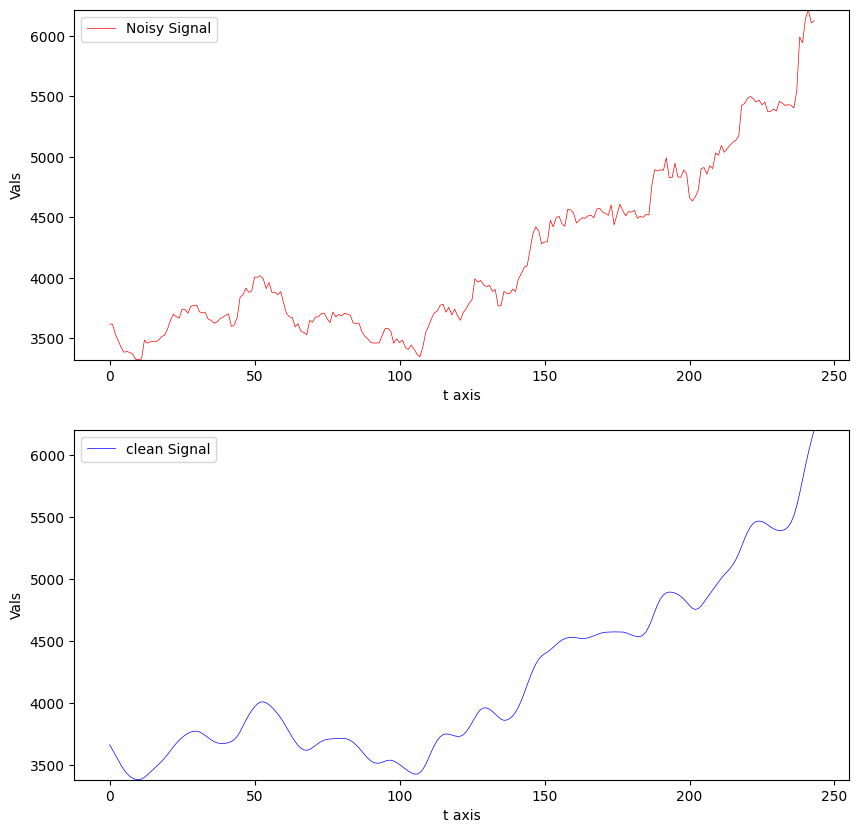

time: 415 ms (started: 2024-10-18 12:40:02 +00:00)


In [ ]:
df_signal = pd.merge(olhc_renamed_dict['close_price'][f'signal_{code}'], denoise_dict['close_price'][f'clean_signal_{code}'], left_index=True, right_index=True, how='inner')
plot_noise_denoise_price(df_signal, code)

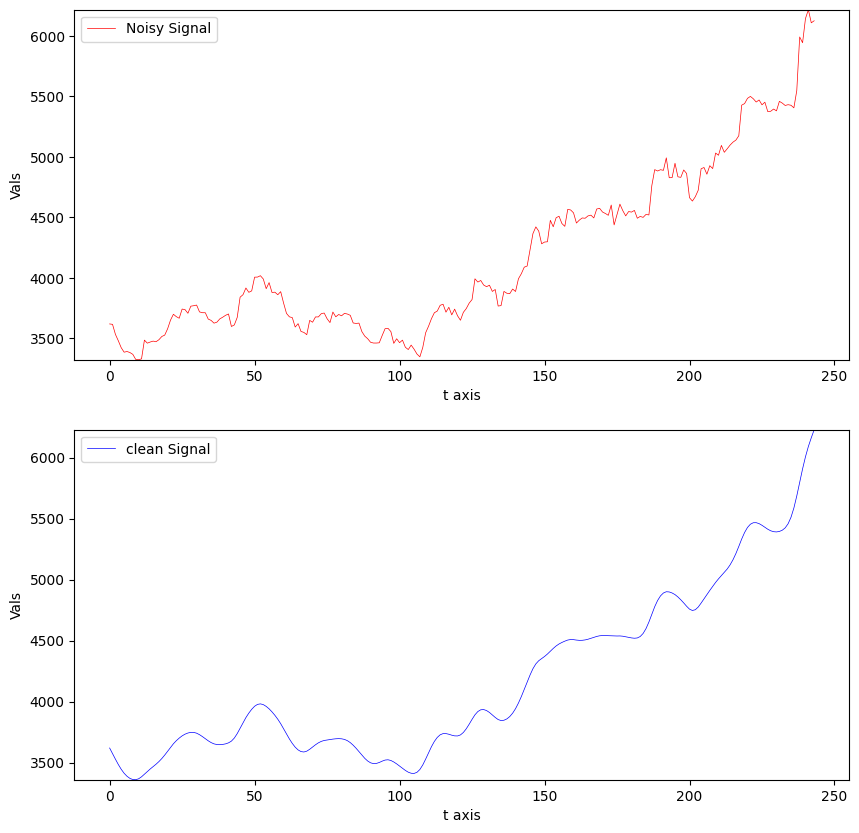

time: 426 ms (started: 2024-10-18 12:40:08 +00:00)


In [ ]:
global_dict[id]['indicator']
df_ind = pd.merge(global_dict[id]['indicator'][f'signal_{code}'], global_dict[id]['clean_indicator'][f'clean_signal_{code}'], left_index=True, right_index=True, how='inner')
plot_noise_denoise_price(df_ind, code)

[2 1 3 4]


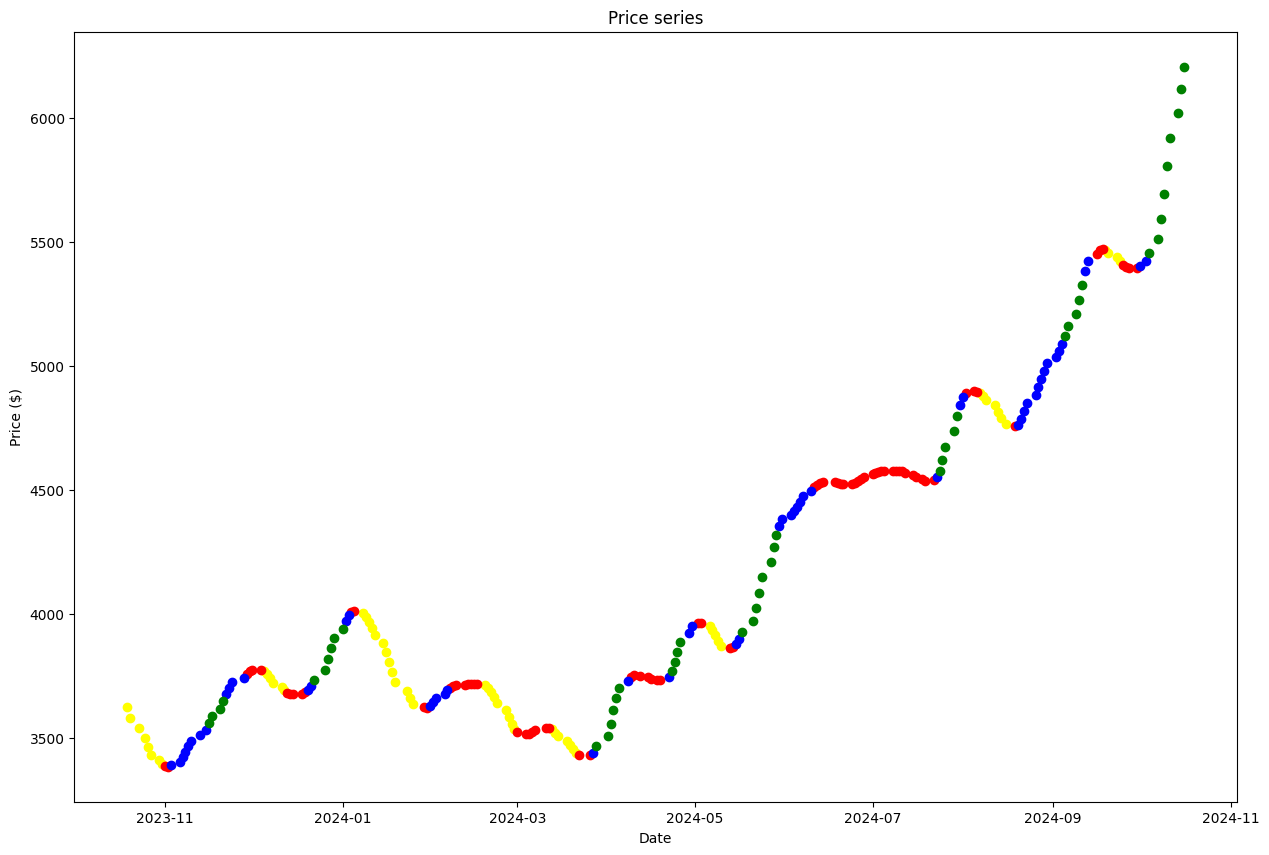

,DIVISLAB_regime,clean_signal_DIVISLAB
Date,,
2023-10-19,2,3625.120010
2023-10-20,2,3582.284271
2023-10-23,2,3539.484842
2023-10-25,2,3499.022662
2023-10-26,2,3463.031927
...,...,...
2024-10-10,4,5807.275664
2024-10-11,4,5918.065710
2024-10-14,4,6022.175735


time: 386 ms (started: 2024-10-18 12:40:12 +00:00)


In [ ]:
df_reg = pd.merge(global_dict[id]['markov_data']['regime_df'][f'{code}_regime'], denoise_dict['close_price'][f'clean_signal_{code}'], left_index=True, right_index=True, how='inner')
plot_data_regime(df_reg, code)
df_reg


[1 2 3 4]


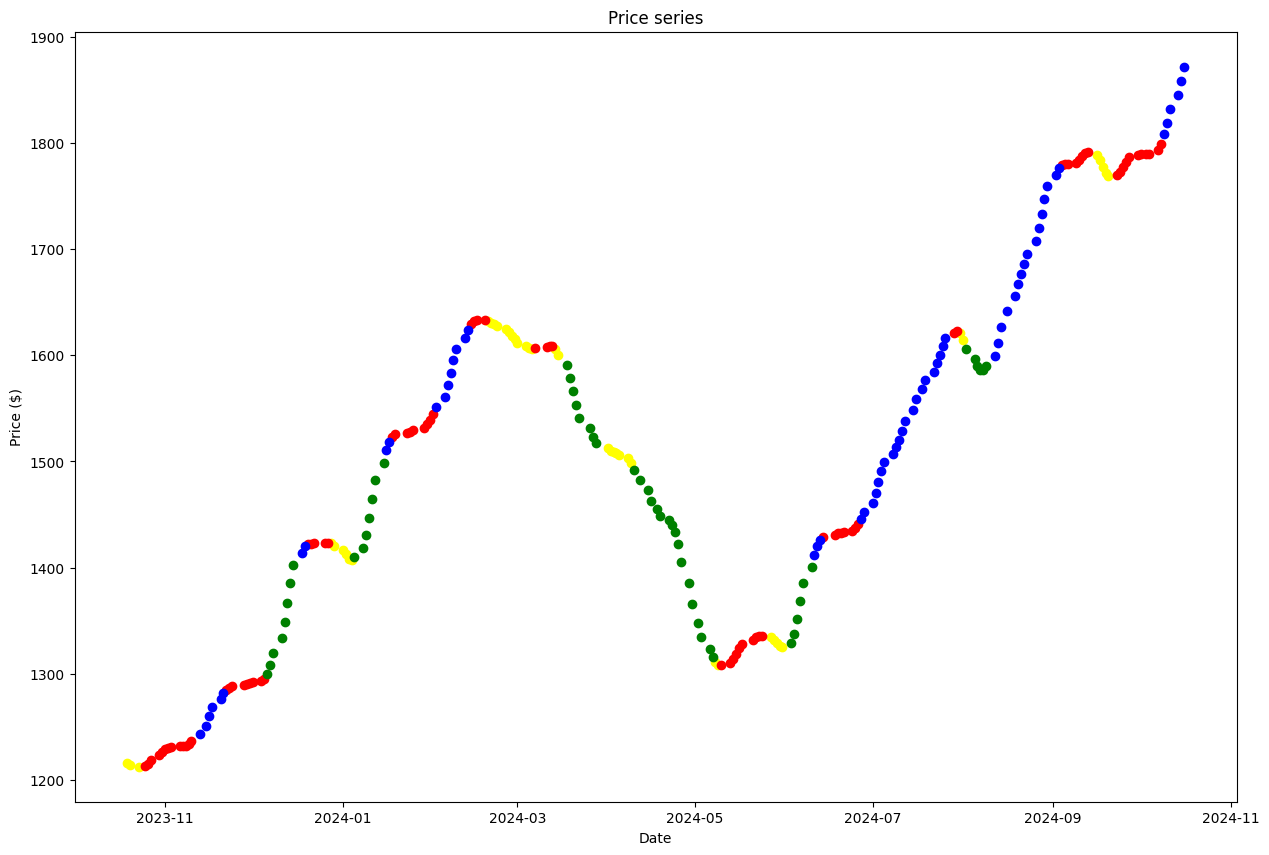

,HCLTECH_regime,clean_signal_HCLTECH
Date,,
2023-10-19,1,1215.315190
2023-10-20,1,1213.433052
2023-10-23,1,1212.227833
2023-10-25,2,1212.632711
2023-10-26,2,1215.055118
...,...,...
2024-10-10,3,1819.413157
2024-10-11,3,1832.271333
2024-10-14,3,1845.724739


time: 404 ms (started: 2024-10-18 12:38:29 +00:00)


In [ ]:
df_reg_ind = pd.merge(global_dict[id]['markov_data']['regime_df'][f'{code}_regime'], global_dict[id]['clean_indicator'][f'clean_signal_{code}'], left_index=True, right_index=True, how='inner')
plot_data_regime(df_reg_ind, code)
df_reg_ind


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("/content/sample_data/tcs.xlsx")

In [ ]:
df['id2'] =  df['id2'].fillna(0).astype(int)



In [ ]:
df

,id1,id2
0,664062,664062
1,809269,814637
2,814637,903771
3,903771,903943
4,903943,918095
5,925526,925526
6,967809,967809
7,974765,967854
8,1238429,974765
9,1238436,1238429


In [ ]:
df['id1'][~df['id1'].isin(df['id2'])]

,id1


In [ ]:
len(df.id2.tolist()), len(df.id1.tolist())

(58, 58)

In [ ]:
len(df.id2.unique().tolist()) , len(df.id1.unique().tolist())

(54, 52)

In [ ]:
for i in df.id2.unique().tolist():
  if i not in df.id1.unique().tolist():
    print(i)


918095
967854
0


In [ ]:
for i in df.id1.unique().tolist():
  if i not in df.id2.unique().tolist():
    print(i)

809269
